In [11]:
import pandas as pd
import numpy as np
import urllib, json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import datetime as dt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# set the standard plot size
plt.rcParams['figure.figsize']=(30,15)

In [12]:
# https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario/resource/455fd63b-603d-4608-8216-7d8647f43350
# make sure to check the limit against current cases

url = "https://data.ontario.ca/en/api/3/action/datastore_search?resource_id=455fd63b-603d-4608-8216-7d8647f43350&limit=1500000"
response = urllib.request.urlopen(url)

In [13]:
data = json.loads(response.read().decode('utf-8'))

In [14]:
df = pd.DataFrame(data['result']['records'])

In [15]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528453 entries, 0 to 528452
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   _id                        528453 non-null  int64  
 1   Row_ID                     528453 non-null  int64  
 2   Accurate_Episode_Date      528453 non-null  object 
 3   Case_Reported_Date         528453 non-null  object 
 4   Test_Reported_Date         515823 non-null  object 
 5   Specimen_Date              526077 non-null  object 
 6   Age_Group                  528453 non-null  object 
 7   Client_Gender              528453 non-null  object 
 8   Case_AcquisitionInfo       528453 non-null  object 
 9   Outcome1                   528453 non-null  object 
 10  Outbreak_Related           89702 non-null   object 
 11  Reporting_PHU_ID           528453 non-null  int64  
 12  Reporting_PHU              528453 non-null  object 
 13  Reporting_PHU_Address      52

,_id,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,1,2020-04-24T00:00:00,2020-05-01T00:00:00,2020-05-01T00:00:00,2020-04-24T00:00:00,50s,MALE,OB,Resolved,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
1,2,2,2020-04-07T00:00:00,2020-04-24T00:00:00,2020-04-24T00:00:00,2020-04-22T00:00:00,40s,FEMALE,OB,Resolved,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
2,3,3,2020-05-29T00:00:00,2020-06-05T00:00:00,2020-06-05T00:00:00,2020-06-05T00:00:00,50s,FEMALE,OB,Resolved,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
3,4,4,2020-03-26T00:00:00,2020-03-30T00:00:00,2020-03-30T00:00:00,2020-03-26T00:00:00,40s,MALE,CC,Resolved,None,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
4,5,5,2020-05-17T00:00:00,2020-05-18T00:00:00,2020-05-18T00:00:00,2020-05-17T00:00:00,40s,FEMALE,CC,Resolved,None,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893


In [45]:
# sort by date
df = df.sort_values(by=['Age_Group'], ascending=True);

In [46]:
# set the dates to datetime64 for later use
df["Accurate_Episode_Date"] = df["Accurate_Episode_Date"].astype("datetime64")
df["Case_Reported_Date"] = df["Case_Reported_Date"].astype("datetime64")
df["Test_Reported_Date"] = df["Test_Reported_Date"].astype("datetime64")
df["Specimen_Date"] = df["Specimen_Date"].astype("datetime64")

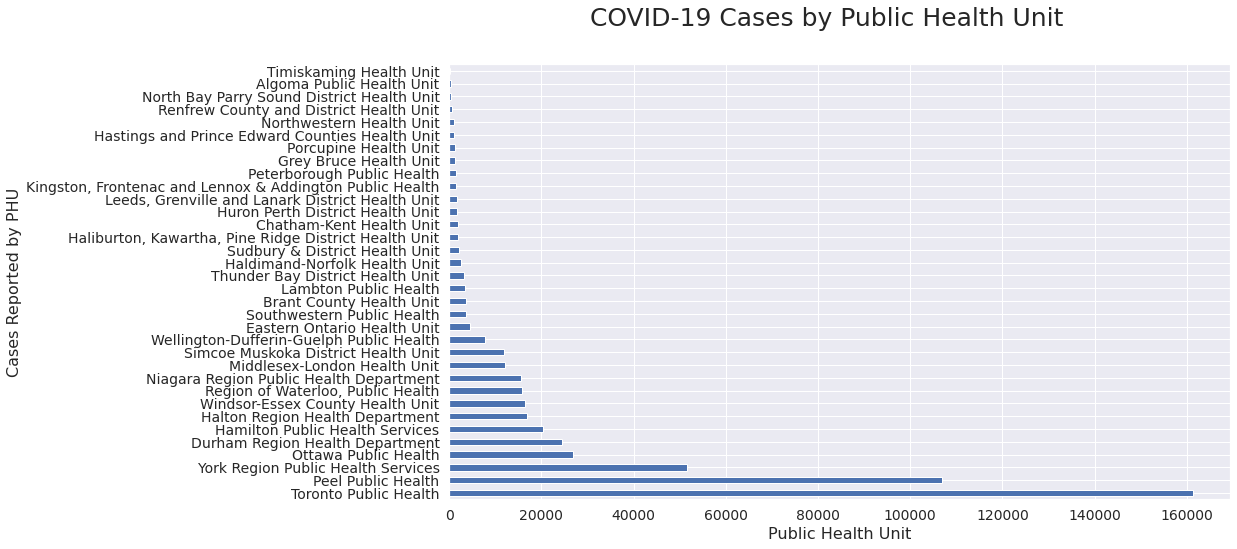

In [47]:
# plot cases by public health unit
fig = plt.figure()
fig.suptitle('COVID-19 Cases by Public Health Unit', fontsize=25) # Add the text/suptitle to figure

ax = df['Reporting_PHU'].value_counts().plot(
    kind='barh', 
    figsize=(14,8)
)
ax.set_xlabel("Public Health Unit", fontsize=16)
ax.set_ylabel("Cases Reported by PHU", fontsize=16)
ax.tick_params(axis='both', labelsize=14)

# if you want to save your graph
# fig.savefig('PHU.jpg')

In [58]:
# deaths only
deaths = df[df.Outcome1 == 'Fatal']
deaths.head()

,_id,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
67668,67652,67652,2021-03-14,2021-03-17,2021-03-26,2021-03-16,20s,MALE,OB,Fatal,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
35215,35204,35204,2020-05-22,2020-05-29,2020-05-29,2020-05-26,20s,MALE,CC,Fatal,None,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
130414,130407,130407,2020-04-19,2020-05-06,NaT,2020-05-03,20s,MALE,OB,Fatal,Yes,2268,Windsor-Essex County Health Unit,1005 Ouellette Avenue,Windsor,N9A 4J8,www.wechu.org,42.308796,-83.033670
244493,244476,244476,2020-03-23,2020-04-06,2020-04-01,2020-03-31,20s,MALE,CC,Fatal,None,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
234140,234119,234119,2021-05-21,2021-05-21,2021-05-21,2021-05-21,20s,FEMALE,MISSING INFORMATION,Fatal,None,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


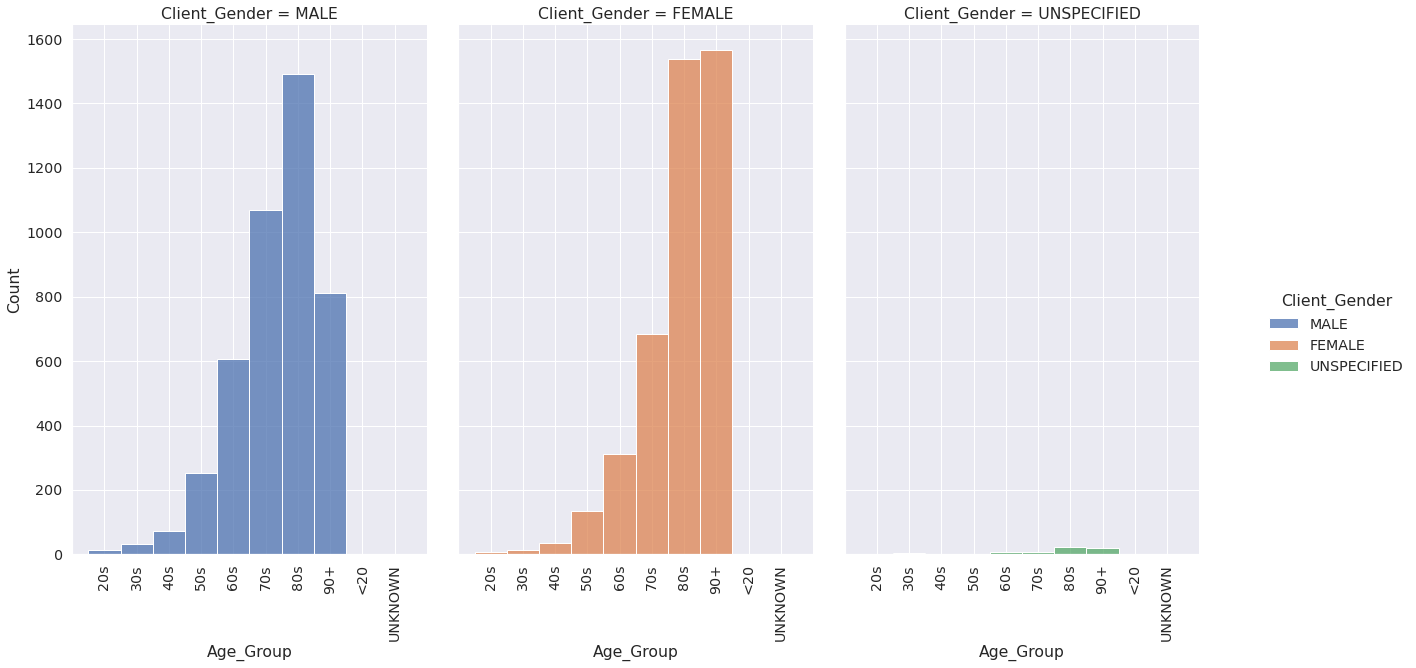

In [59]:
# side-by-side comparison
g = sns.displot(deaths, x="Age_Group", hue="Client_Gender", multiple="dodge", col="Client_Gender")
g.set_xticklabels(rotation=90)
sns.set(font_scale=1.3) # seaborn's method for setting fontsize is pretty dumb
g.fig.set_size_inches(20,10)

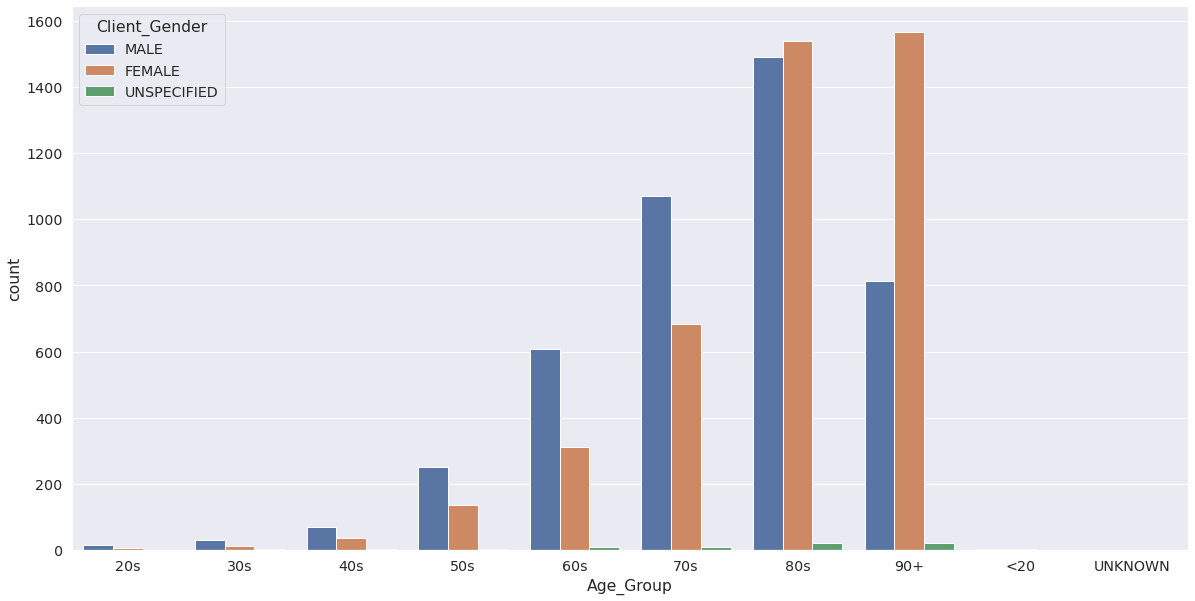

In [60]:
plt.figure(figsize=(20,10))
age = ["19 and younger", "20 to 29 Years", "30 to 39 Years", "40 to 49 Years", "50 to 59 Years", "60 to 69 Years", "70 to 79 Years", "80 to 89 Years", "90 and older"]
g = sns.countplot(data=deaths, x="Age_Group", hue="Client_Gender")
sns.set(font_scale=1.3) # seaborn's method for setting fontsize is pretty dumb

In [61]:
deaths.head()

,_id,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
67668,67652,67652,2021-03-14,2021-03-17,2021-03-26,2021-03-16,20s,MALE,OB,Fatal,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
35215,35204,35204,2020-05-22,2020-05-29,2020-05-29,2020-05-26,20s,MALE,CC,Fatal,None,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
130414,130407,130407,2020-04-19,2020-05-06,NaT,2020-05-03,20s,MALE,OB,Fatal,Yes,2268,Windsor-Essex County Health Unit,1005 Ouellette Avenue,Windsor,N9A 4J8,www.wechu.org,42.308796,-83.033670
244493,244476,244476,2020-03-23,2020-04-06,2020-04-01,2020-03-31,20s,MALE,CC,Fatal,None,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
234140,234119,234119,2021-05-21,2021-05-21,2021-05-21,2021-05-21,20s,FEMALE,MISSING INFORMATION,Fatal,None,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


In [72]:
# mar
mar_start = pd.to_datetime('2021-03-01')
mar_end = pd.to_datetime('2021-03-31')
mar_2021 = deaths.loc[(deaths['Accurate_Episode_Date'] > mar_start) & (deaths['Accurate_Episode_Date'] < mar_end)]

# apr
apr_start = pd.to_datetime('2021-04-01')
apr_end = pd.to_datetime('2021-04-30')
apr_2021 = deaths.loc[(deaths['Accurate_Episode_Date'] > apr_start) & (deaths['Accurate_Episode_Date'] < apr_end)]

# may
may_start = pd.to_datetime('2021-05-01')
may_end = pd.to_datetime('2021-05-31')
may_2021 = deaths.loc[(deaths['Accurate_Episode_Date'] > may_start) & (deaths['Accurate_Episode_Date'] < may_end)]

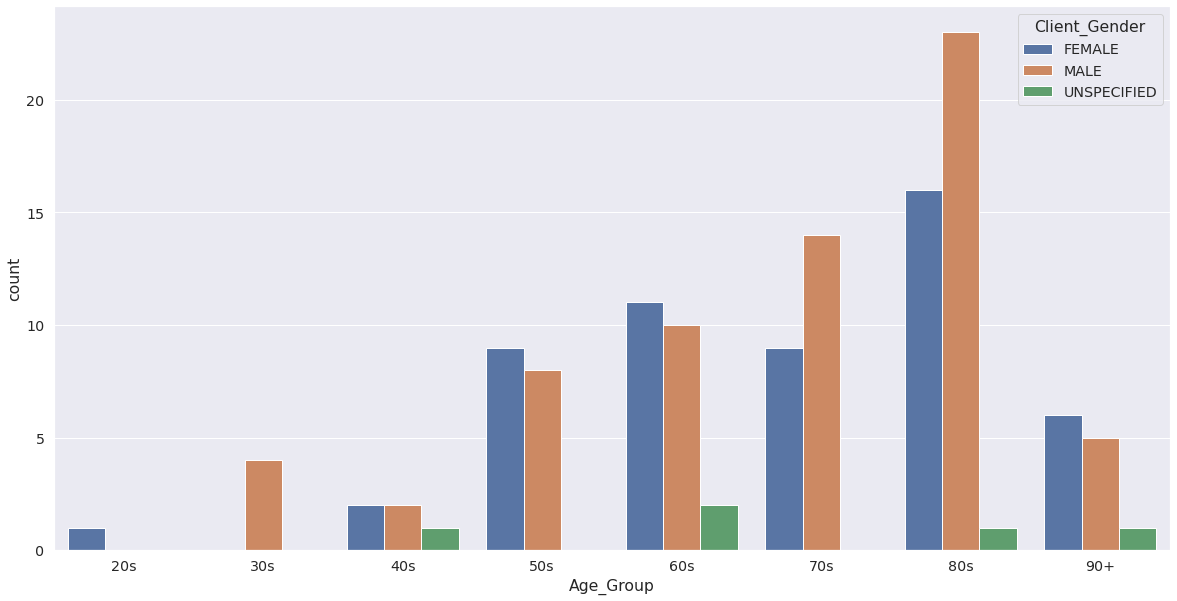

In [73]:
plt.figure(figsize=(20,10))
g = sns.countplot(data=may_2021, x="Age_Group", hue="Client_Gender")
sns.set(font_scale=1.3)

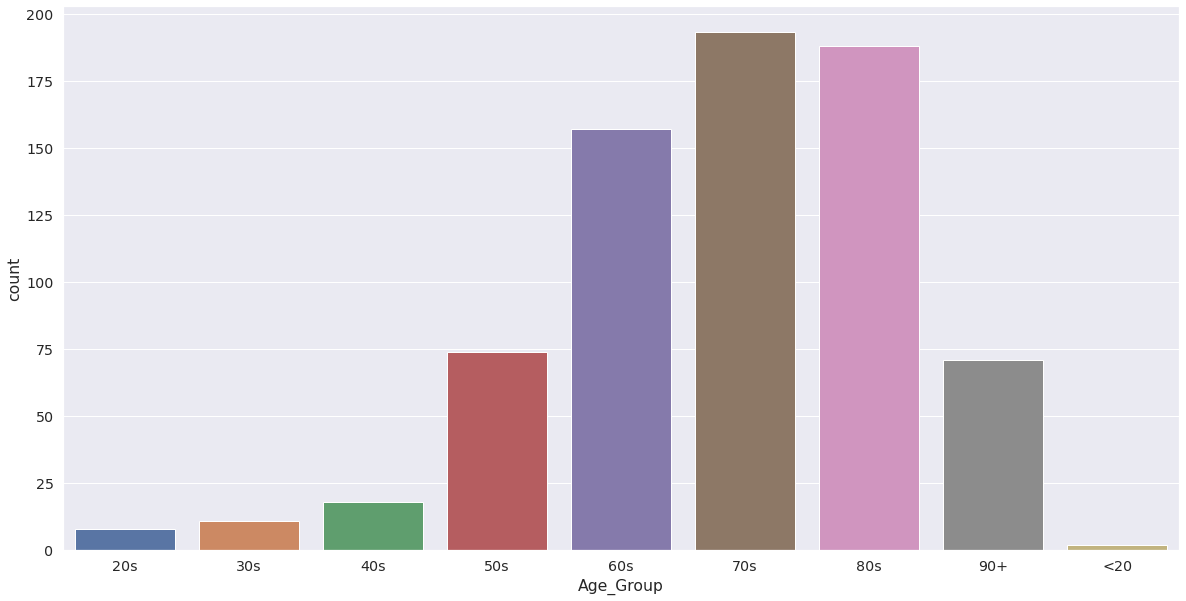

In [77]:
plt.figure(figsize=(20,10))
g = sns.countplot(data=apr_2021, x="Age_Group")
sns.set(font_scale=1.3)

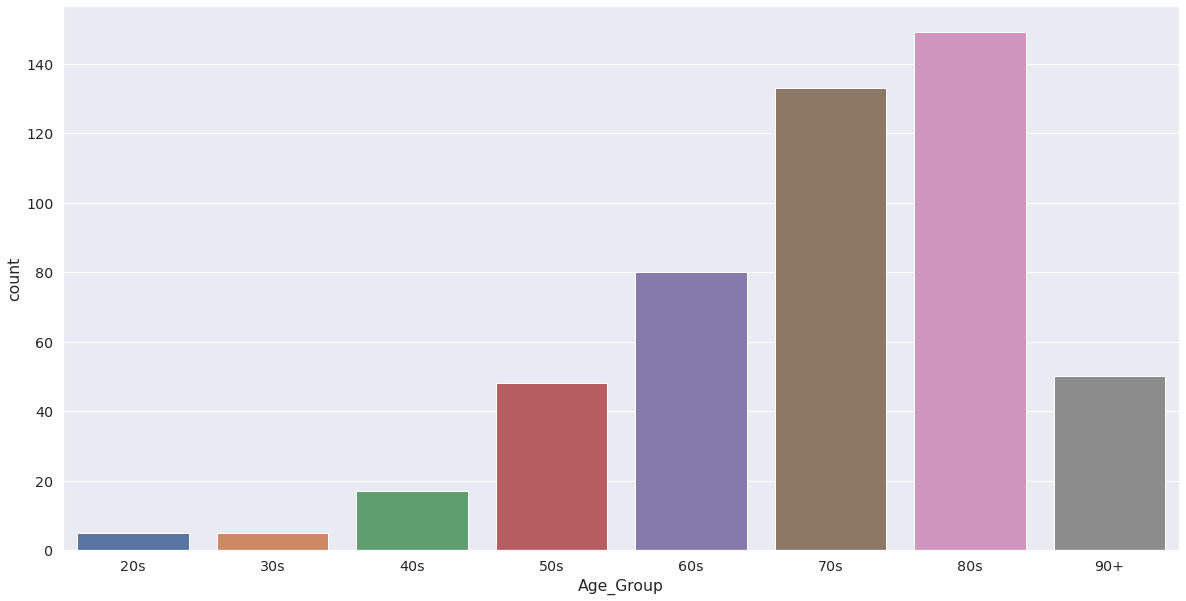

In [76]:
plt.figure(figsize=(20,10))
g = sns.countplot(data=mar_2021, x="Age_Group")
sns.set(font_scale=1.3)

# do small multiples with plotly and bar race in mpl
https://plotly.com/python/subplots/

https://pratapvardhan.com/blog/bar-chart-race-python-matplotlib/